# Problem 3.12

## Part a.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from tqdm.notebook import tqdm

In [2]:
dt = 0.001

In [3]:
t = np.arange(0, 100, dt)

In [4]:
theta = np.zeros_like(t)
theta_dot = np.zeros_like(t)

In [5]:
theta[0] = 2 * np.pi / 3

Using the default update.

In [6]:
for i in tqdm(range(1, t.size)):
    theta_dot[i] = theta_dot[i-1] - 9.8 * np.sin(theta[i-1]) * dt
    theta[i] = theta[i-1] + theta_dot[i] * dt

  0%|          | 0/99999 [00:00<?, ?it/s]

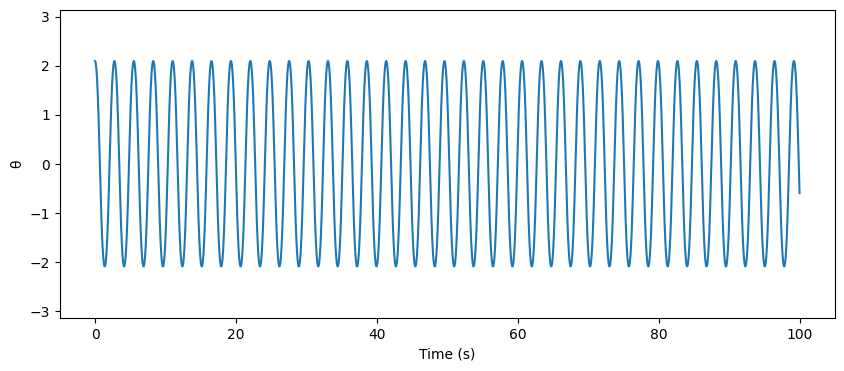

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('θ')
plt.ylim([-np.pi, np.pi]);

Now we try using the Euler method.

In [8]:
theta = np.zeros_like(t)
theta_dot = np.zeros_like(t)

theta[0] = 2 * np.pi / 3

for i in tqdm(range(1, t.size)):
    theta[i] = theta[i-1] + theta_dot[i-1] * dt
    theta_dot[i] = theta_dot[i-1] - 9.8 * np.sin(theta[i-1]) * dt

  0%|          | 0/99999 [00:00<?, ?it/s]

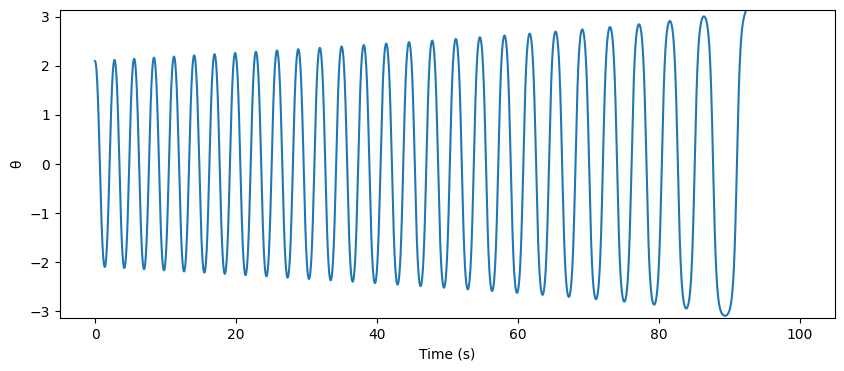

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('θ')
plt.ylim([-np.pi, np.pi]);

## Part b.

$$
\begin{eqnarray}
\theta(t + \delta) & = & \theta(t) + \left[\theta(t) + \ddot{\theta}(t) \delta \right] \delta \\
& = & \theta(t) + \theta(t) \delta + \ddot{\theta}(t) \delta^2
\end{eqnarray}
$$

Since the second-order term in the Taylor expansion should be $1/2a$, the error on each time step is of order $\delta^2$.  Since there are $N \sim 1 / \delta$ steps, the cumulative error is $\sim \delta$.

## Part c.

In [10]:
def pendulum_integrate(dt, stop=10):
    t = np.arange(0, stop, dt)
    theta = np.zeros_like(t)
    theta_dot = np.zeros_like(t)

    theta[0] = 2 * np.pi / 3

    for i in range(1, t.size):
        theta_dot[i] = theta_dot[i-1] - 9.8 * np.sin(theta[i-1]) * dt
        theta[i] = theta[i-1] + theta_dot[i] * dt
    
    return t, theta

In [11]:
t_1em1, theta_1em1 = pendulum_integrate(0.1)
t_1em2, theta_1em2 = pendulum_integrate(0.01)
t_1em3, theta_1em3 = pendulum_integrate(0.001)

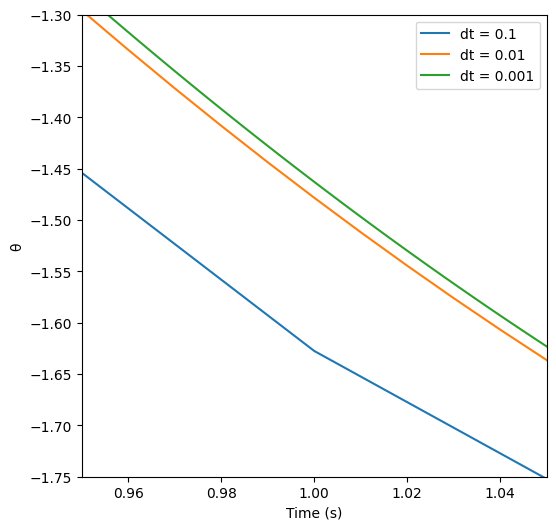

In [12]:
plt.figure(figsize=(6, 6))
plt.plot(t_1em1, theta_1em1, label='dt = 0.1')
plt.plot(t_1em2, theta_1em2, label='dt = 0.01')
plt.plot(t_1em3, theta_1em3, label='dt = 0.001')
plt.xlabel('Time (s)')
plt.ylabel('θ')
plt.xlim([0.95, 1.05])
plt.ylim([-1.75, -1.3])
plt.legend();

The improvement does seem to be linear in the step size.

## Part e.

Now we have

$$
\theta(t + \delta) = \theta(t) + \dot{\theta}(t) \delta + \frac{1}{2} \ddot{\theta}(t) \delta^2
$$

so, the error on each time step should be of order $\delta^3$.  The cumulative error is then $\sim \delta^2$.

## Part f.

In [13]:
def pendulum_verlet(dt, stop=100):
    t = np.arange(0, stop, dt)
    theta = np.zeros(int(stop / dt))
    theta_dot = np.zeros(int(2 * stop // dt))

    theta[0] = 2 * np.pi / 3

    for i in range(1, theta.size):
        theta_dot[2 * i - 1] = theta_dot[2*i-2] - 9.8 * np.sin(theta[i-1]) * dt / 2
        theta[i] = theta[i-1] + theta_dot[2*i-1] * dt
        theta_dot[2*i] = theta_dot[2*i-1] - 9.8 * np.sin(theta[i]) * dt / 2
    
    return t, theta

In [14]:
t_verlet_1em1, theta_verlet_1em1 = pendulum_verlet(0.1)
t_verlet_1em2, theta_verlet_1em2 = pendulum_verlet(0.01)
t_verlet_1em3, theta_verlet_1em3 = pendulum_verlet(0.001)

Text(0, 0.5, 'θ')

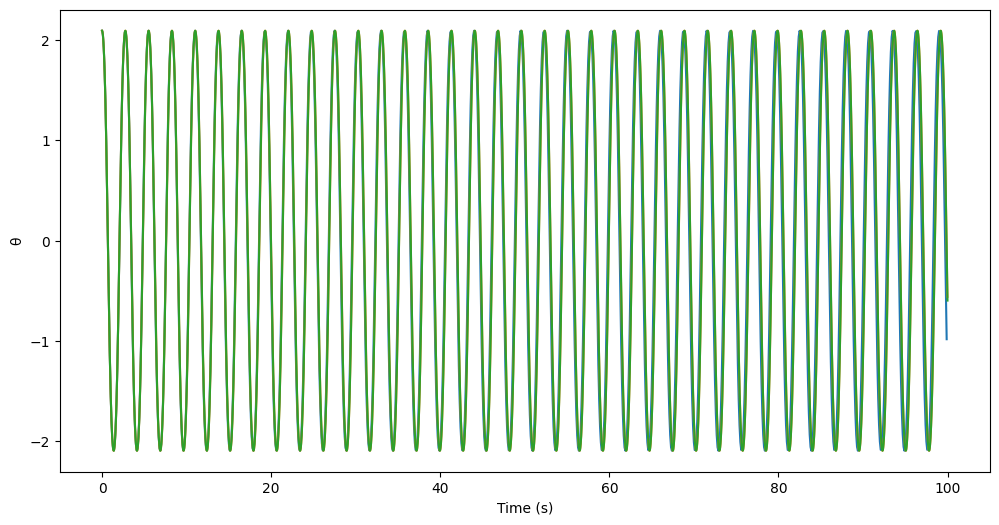

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(t_verlet_1em1, theta_verlet_1em1, label='dt = 0.1')
plt.plot(t_verlet_1em2, theta_verlet_1em2, label='dt = 0.01')
plt.plot(t_verlet_1em3, theta_verlet_1em3, label='dt = 0.001')
plt.xlabel('Time (s)')
plt.ylabel('θ')

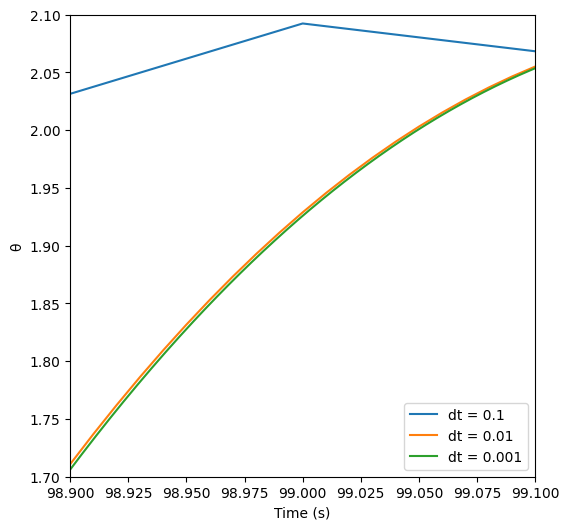

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(t_verlet_1em1, theta_verlet_1em1, label='dt = 0.1')
plt.plot(t_verlet_1em2, theta_verlet_1em2, label='dt = 0.01')
plt.plot(t_verlet_1em3, theta_verlet_1em3, label='dt = 0.001')
plt.xlabel('Time (s)')
plt.ylabel('θ')
plt.xlim([98.9, 99.1])
plt.ylim([1.7, 2.1])
plt.legend();

The improvement in accuracy does appear to be second-order in the step size.

## Part g.

In [17]:
def pendulum_integrate(dt, theta_init=2*np.pi/3, stop=10):
    t = np.arange(0, stop, dt)
    theta = np.zeros_like(t)
    theta_dot = np.zeros_like(t)

    theta[0] = theta_init

    for i in range(1, t.size):
        theta_dot[i] = theta_dot[i-1] - 9.8 * np.sin(theta[i-1]) * dt
        theta[i] = theta[i-1] + theta_dot[i] * dt
    
    return t, theta

In [18]:
deltas = np.arange(0.1, 0.9, 0.1)

In [19]:
trajectories = [
    pendulum_integrate(dt, theta_init=0.01) for dt in deltas
]

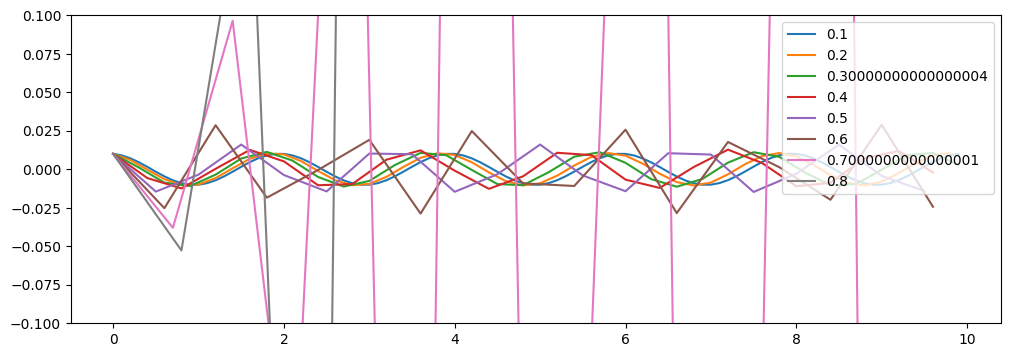

In [20]:
plt.figure(figsize=(12, 4))

for delta, (t, trajectory) in zip(deltas, trajectories):
    plt.plot(t, trajectory, label=str(delta))

plt.ylim([-0.1, 0.1])
plt.legend();

The oscillation goes unstable at around 0.7.

In [21]:
t, trajectory = pendulum_integrate(0.35, theta_init=0.01, stop=100)

In [22]:
(np.max(trajectory) - np.min(trajectory)) / 2

0.011952957227600303

So at $\delta_c / 2$ there is an error of ~20%.

## Part h.

In [23]:
def pendulum_step(t, y):
    theta, theta_dot = y
    theta_dot_dot = -9.8 * np.sin(theta)
    
    return np.array([theta_dot, theta_dot_dot])

In [24]:
t = np.arange(0, 100, 0.1)

In [25]:
trajectory_rk = scipy.integrate.solve_ivp(pendulum_step, [0, 100], np.array([2 * np.pi / 3, 0]))

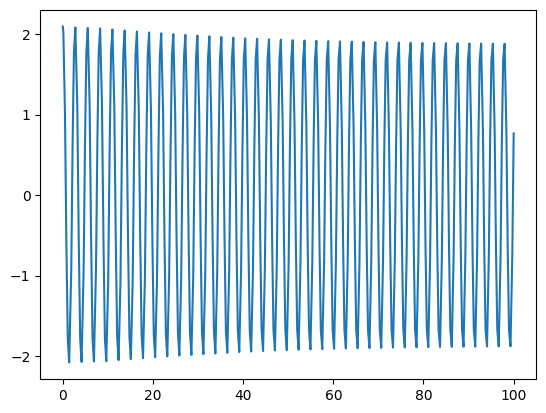

In [26]:
plt.plot(trajectory_rk.t, trajectory_rk.y[0])

In [27]:
trajectory_rk_1em1 = scipy.integrate.solve_ivp(pendulum_step, [0, 100], np.array([2 * np.pi / 3, 0]), max_step=0.1)

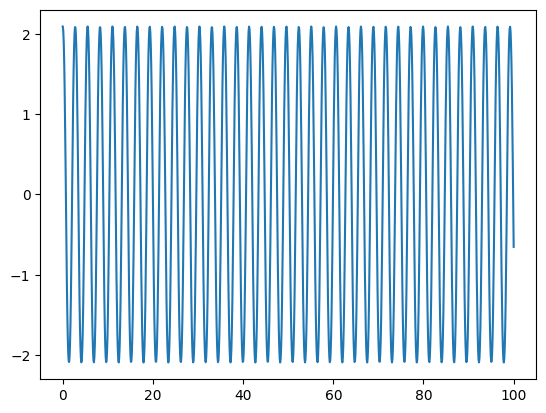

In [28]:
plt.plot(trajectory_rk_1em1.t, trajectory_rk_1em1.y[0])